## Método de Neville para Interpolación Polinómica
### Descripción
El método de Neville es un algoritmo recursivo para calcular el polinomio interpolador de Lagrange sin necesidad de calcular explícitamente los coeficientes. Construye una tabla triangular de polinomios donde cada P_{i,j} es el polinomio que interpola los puntos x_i a x_j.

Tabla completa de polinomios generados por el método de Neville:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

--------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

--------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

--------------------------------------------------


<IPython.core.display.Math object>

--------------------------------------------------

Polinomio interpolador final:


<IPython.core.display.Math object>

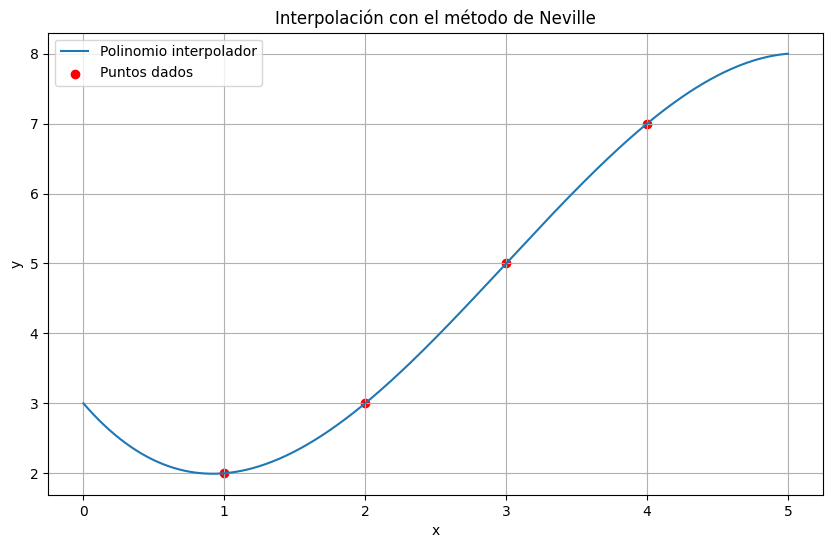

In [2]:
import numpy as np
import sympy
from IPython.display import display, Math
import matplotlib.pyplot as plt

def metodo_neville(nodos, verbose=True):
    """
    Implementación del método de Neville para interpolación polinómica
    
    Args:
        nodos: Tupla (x, y) donde x e y son arrays de numpy con los puntos a interpolar
        verbose: Si True, muestra la tabla completa de polinomios
        
    Returns:
        Una tupla con (tabla de polinomios, polinomio final en formato sympy)
    """
    x, y = nodos
    n = len(x)
    x_sym = sympy.symbols('x')
    
    # Tabla de polinomios
    tabla = np.empty((n, n), dtype=object)
    
    # Polinomios de grado 0
    for i in range(n):
        tabla[i, 0] = sympy.sympify(y[i])
    
    # Tabla recursivamente
    for j in range(1, n):
        for i in range(n - j):
            numerador = (x_sym - x[i])*tabla[i+1, j-1] - (x_sym - x[i+j])*tabla[i, j-1]
            denominador = x[i+j] - x[i]
            tabla[i, j] = sympy.simplify(numerador / denominador)
    
    # Mostrar la tabla si verbose=True
    if verbose:
        print("Tabla completa de polinomios generados por el método de Neville:")
        for j in range(n):
            for i in range(n - j):
                display(Math(f'P_{{{i},{i+j}}}(x) = {sympy.latex(tabla[i, j])}'))
            print("-"*50)
    
    return tabla, tabla[0, n-1]

# Ejemplo
def ejemplo_neville():
    # Puntos de ejemplo
    x = np.array([1, 2, 3, 4], dtype=float)
    y = np.array([2, 3, 5, 7], dtype=float)
    
    # Aplicar el método de Neville
    tabla, polinomio_final = metodo_neville((x, y))
    
    # Mostrar resultados
    print("\nPolinomio interpolador final:")
    display(Math(f'P(x) = {sympy.latex(polinomio_final)}'))
    
    # Graficar
    x_vals = np.linspace(min(x)-1, max(x)+1, 400)
    y_vals = [polinomio_final.subs('x', val) for val in x_vals]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='Polinomio interpolador')
    plt.scatter(x, y, color='red', label='Puntos dados')
    plt.title('Interpolación con el método de Neville')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return tabla, polinomio_final

tabla_resultados, polinomio_resultante = ejemplo_neville()